<a href="https://colab.research.google.com/github/TyronSamaroo/Visual_Analytics/blob/main/Tyron_Samaroo_PCA_Visual_ANAlytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tyron Samaroo 

## Libraries 

In [45]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import requests
import json

## Reading CSV 

Data comes from https://data.ny.gov/Transportation/Fare-Card-History-for-Metropolitan-Transportation-/v7qc-gwpn

These files show the number of MetroCard swipes made each week by customers entering each station of the New York City Subway, PATH, AirTrain JFK and the Roosevelt Island Tram, broken out to show the relative popularity of the various types of MetroCards. MTA New York City Transit posts the latest data every Saturday by 1 a.m., and the dates listed in the links reference the date the data is posted. The data in the files covers seven-day periods beginning on the Saturday two weeks prior to the posting date and ending on the following Friday.

In [55]:
!wget https://data.ny.gov/api/views/v7qc-gwpn/rows.csv

--2021-12-07 00:24:12--  https://data.ny.gov/api/views/v7qc-gwpn/rows.csv
Resolving data.ny.gov (data.ny.gov)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.ny.gov (data.ny.gov)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv.1’

rows.csv.1              [       <=>          ]  14.97M   528KB/s               ^C


In [56]:
df = pd.read_csv('rows.csv')

## Analysis 

In [58]:
df.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,05/29/2010,06/04/2010,R001,WHITEHALL STREET,56961,1732,203,883,358,17654,32369,59.0,6733.0,1835.0,426,892,0,1035,4798,431,91,0,418,0,0,0
1,05/29/2010,06/04/2010,R002,FULTON ST & BROADWAY NASSAU,16210,503,41,157,29,3536,11462,8.0,451.0,598.0,50,389,0,90,3578,83,51,0,70,0,0,0
2,05/29/2010,06/04/2010,R003,CYPRESS HILLS,3292,110,7,41,0,1404,1344,0.0,36.0,174.0,5,20,0,4,154,9,1,0,5,0,0,0
3,05/29/2010,06/04/2010,R004,75TH STREET & ELDERTS LANE,7774,257,20,125,0,2878,4472,1.0,79.0,278.0,7,27,0,9,409,20,2,0,20,0,0,0
4,05/29/2010,06/04/2010,R005,85TH STREET & FOREST PKWAY,8794,420,32,142,1,2997,5297,0.0,88.0,353.0,6,48,0,10,317,9,22,0,28,0,0,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250874 entries, 0 to 250873
Data columns (total 26 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   From Date                                    250874 non-null  object 
 1   To Date                                      250874 non-null  object 
 2   Remote Station ID                            250874 non-null  object 
 3   Station                                      250874 non-null  object 
 4   Full Fare                                    250874 non-null  int64  
 5   Senior Citizen / Disabled                    250874 non-null  int64  
 6   7 Day ADA Farecard Access System Unlimited   250874 non-null  int64  
 7   30 Day ADA Farecard Access System Unlimited  250874 non-null  int64  
 8   Joint Rail Road Ticket                       250874 non-null  int64  
 9   7 Day Unlimited                              250874 non-nul

In [60]:
df.describe()

,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
count,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,210076.000000,210076.000000,210076.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000,250874.000000
mean,26076.792557,1470.705856,144.890280,411.707766,91.244988,11196.737175,16909.617206,1.914188,44.809912,89.816600,47.183020,283.073104,290.271587,156.844918,1387.440644,422.631177,246.105750,56.555339,429.118685,54.097786,14.469076,1.712752
std,33488.471559,1933.050843,166.485472,538.934222,389.173295,12761.516836,21826.380996,10.267916,362.391532,502.793153,143.635225,474.526322,433.830355,681.204948,1976.359838,857.698047,405.914798,491.744343,2193.303158,940.021749,269.068443,38.104769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8077.000000,399.000000,41.000000,108.000000,1.000000,3151.000000,3643.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,1.000000,275.000000,33.000000,29.000000,0.000000,37.000000,0.000000,0.000000,0.000000
50%,14415.000000,782.000000,93.000000,247.000000,5.000000,7268.000000,9245.500000,0.000000,0.000000,0.000000,5.000000,106.000000,159.000000,7.000000,687.000000,107.000000,93.000000,0.000000,102.000000,0.000000,0.000000,0.000000
75%,30621.000000,1714.000000,185.000000,490.000000,25.000000,14821.000000,22378.000000,0.000000,0.000000,0.000000,25.000000,291.000000,396.750000,38.000000,1672.000000,384.000000,289.000000,0.000000,322.000000,0.000000,0.000000,0.000000
max,381270.000000,18663.000000,1851.000000,6116.000000,7951.000000,147324.000000,276941.000000,457.000000,18867.000000,21757.000000,2460.000000,4849.000000,5787.000000,16197.000000,26099.000000,25825.000000,15030.000000,14035.000000,70177.000000,27988.000000,12006.000000,1329.000000


## EDA 

Notice that mutiple data point for a single remote station id

In [57]:
df[df['Remote Station ID'] == 'R098']

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,30 Day Unlimited,14 Day Reduced Fare Media Unlimited,1 Day Unlimited,14 Day Unlimited,7 Day Express Bus Pass,Transit Check Metrocard,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
88,05/29/2010,06/04/2010,R098,CHURCH AVENUE,30236,1438,328,830,7,16795,23070,77.0,531.0,2284.0,50,169,0,30,2894,51,47,0,49,0,0,0
551,06/05/2010,06/11/2010,R098,CHURCH AVENUE,31145,1454,320,844,13,17784,23916,72.0,548.0,2475.0,56,198,0,14,3214,60,50,0,80,0,0,0
1014,06/12/2010,06/18/2010,R098,CHURCH AVENUE,31242,1513,328,872,17,18119,23859,82.0,499.0,2592.0,39,129,0,21,3289,55,49,0,78,0,0,0
1477,06/19/2010,06/25/2010,R098,CHURCH AVENUE,31639,1450,327,828,8,17815,23808,79.0,555.0,2483.0,64,148,0,17,3191,29,51,0,60,0,0,0
1942,06/26/2010,07/02/2010,R098,CHURCH AVENUE,32316,1468,319,770,5,17185,23327,59.0,542.0,2316.0,54,178,0,13,3000,36,53,0,87,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248621,06/26/2021,07/02/2021,R098,CHURCH AVENUE,16661,1617,217,307,3,8719,6583,6.0,91.0,2.0,0,835,144,172,0,98,0,0,0,330,0,0
249091,12/25/2010,12/31/2010,R098,CHURCH AVENUE,15534,650,109,355,3,6504,8512,31.0,59.0,845.0,19,60,0,10,1103,13,29,0,46,0,0,0
249556,07/09/2021,07/03/2021,R098,CHURCH AVENUE,16237,1464,223,284,3,8221,6318,13.0,88.0,2.0,0,753,116,190,0,110,0,0,0,137,0,0
250025,07/23/2021,07/17/2021,R098,CHURCH AVENUE,17226,1661,233,347,4,8773,6767,24.0,84.0,0.0,0,801,138,226,0,95,0,0,0,354,0,0


In [33]:
df.iloc[0]

from_date                                       2021-08-06T00:00:00.000
to_date                                         2021-07-31T00:00:00.000
remote_station_id                                                  R001
station                                                WHITEHALL STREET
full_fare                                                         27946
senior_citizen_disabled                                            1824
_7_day_ada_farecard_access_system_unlimited                         242
_30_day_ada_farecard_access_system_unlimited                        376
joint_rail_road_ticket                                                8
_7_day_unlimited                                                  11958
_30_day_unlimited                                                  6355
_14_day_reduced_fare_media_unlimited                                 92
_1_day_unlimited                                                    159
_14_day_unlimited                                               

In [34]:
df.describe()

,from_date,to_date,remote_station_id,station,full_fare,senior_citizen_disabled,_7_day_ada_farecard_access_system_unlimited,_30_day_ada_farecard_access_system_unlimited,joint_rail_road_ticket,_7_day_unlimited,_30_day_unlimited,_14_day_reduced_fare_media_unlimited,_1_day_unlimited,_14_day_unlimited,_7_day_express_bus_pass,transit_check_metrocard,lib_special_senior,rail_road_unlimited_no_trade,transit_check_metrocard_annual_metrocard,mail_and_ride_easy_pay_express,mail_and_ride_unlimited,path_2_trip,airtrain_full_fare,airtrain_30_day,airtrain_10_trip,airtrain_monthly
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,469,457,971,780,265,402,52,915,918,131,271,20,86,531,423,308,29,396,7,8,5,385,5,4
top,2021-08-06T00:00:00.000,2021-07-31T00:00:00.000,R046,42ND STREET & GRAND CENTRAL,4564,0,0,0,0,0,0,0,18,0,0,0,0,0,0,14,0,0,0,0,0,0
freq,469,469,3,9,3,26,33,32,516,30,30,154,21,589,532,30,27,35,970,19,980,978,995,31,985,969


In [35]:
df.isna().sum()

from_date                                       0
to_date                                         0
remote_station_id                               0
station                                         0
full_fare                                       0
senior_citizen_disabled                         0
_7_day_ada_farecard_access_system_unlimited     0
_30_day_ada_farecard_access_system_unlimited    0
joint_rail_road_ticket                          0
_7_day_unlimited                                0
_30_day_unlimited                               0
_14_day_reduced_fare_media_unlimited            0
_1_day_unlimited                                0
_14_day_unlimited                               0
_7_day_express_bus_pass                         0
transit_check_metrocard                         0
lib_special_senior                              0
rail_road_unlimited_no_trade                    0
transit_check_metrocard_annual_metrocard        0
mail_and_ride_easy_pay_express                  0


## Setup for EDA

- Filling in empty values and dropping any null values. 
- Using a sample of 500

In [64]:
df.fillna(0)
df.dropna(inplace=True)
df = df.sample(500)

## Removing all catagorical attributes 

In [65]:
numerical_data = df.select_dtypes(exclude=['object'])


In [66]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 200033 to 131688
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Full Fare                                    500 non-null    int64  
 1   Senior Citizen / Disabled                    500 non-null    int64  
 2   7 Day ADA Farecard Access System Unlimited   500 non-null    int64  
 3   30 Day ADA Farecard Access System Unlimited  500 non-null    int64  
 4   Joint Rail Road Ticket                       500 non-null    int64  
 5   7 Day Unlimited                              500 non-null    int64  
 6   30 Day Unlimited                             500 non-null    int64  
 7   14 Day Reduced Fare Media Unlimited          500 non-null    float64
 8   1 Day Unlimited                              500 non-null    float64
 9   14 Day Unlimited                             500 non-null    float64

In [67]:
numerical_data_scaled = scale(numerical_data)
pca = PCA(n_components=2)
pca_df = pca.fit_transform(numerical_data_scaled)

In [68]:
pca_df.shape

(500, 2)

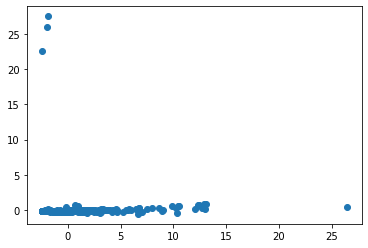

In [69]:
plt.scatter(pca_df[:,0], pca_df[:,1])

## Another try at PCA with less features

In [75]:
numeric_columns = ['Full Fare', 'Airtran Full Fare','Joint Rail Road Ticket', '30 Day Unlimited', 'Path 2 Trip']
numerical_data_2 = df[numeric_columns]

In [76]:
numerical_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 200033 to 131688
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Full Fare               500 non-null    int64
 1   Airtran Full Fare       500 non-null    int64
 2   Joint Rail Road Ticket  500 non-null    int64
 3   30 Day Unlimited        500 non-null    int64
 4   Path 2 Trip             500 non-null    int64
dtypes: int64(5)
memory usage: 23.4 KB


In [77]:
numerical_data_scaled_2 = scale(numerical_data_2)
pca = PCA(n_components=2)
pca_df = pca.fit_transform(numerical_data_scaled_2)

In [78]:
pca_df.shape

(500, 2)

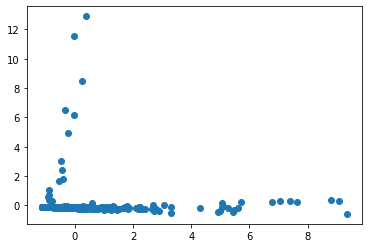

In [79]:
plt.scatter(pca_df[:,0], pca_df[:,1])

In [80]:
len(df['Station'].value_counts())

308

In [81]:
unique_stations = list(df["Station"].unique())
list_of_stations = list(df["Station"].values)

In [98]:
df['Station'].value_counts()[:3]

39TH AVENUE & 31ST STREET    7
34TH STREET & 8TH AVENUE     4
SENECA AVENUE-PALMETTO ST    4
Name: Station, dtype: int64

## PCA plot of two PCA components and label using stations 

In [110]:
station_index = [unique_stations.index(value) for value in list_of_stations]
smaller_station_index =[unique_stations_3.index(value) for value in list_of_stations_3]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


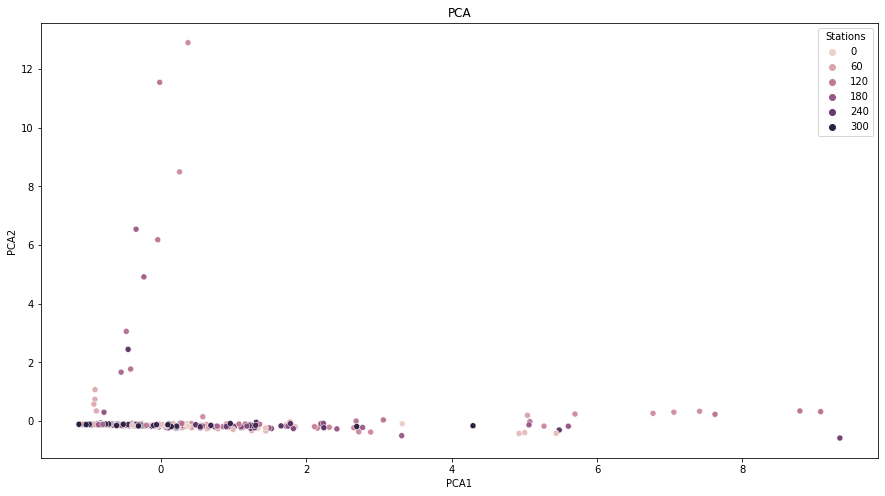

In [83]:
plt.figure(figsize=(15,8))
sns.scatterplot(pca_df[:,0], pca_df[:,1], hue=station_index)
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Stations')

In [123]:
top_3_station_df =df[df['Station'].isin(['39TH AVENUE & 31ST STREET', '34TH STREET & 8TH AVENUE', 'SENECA AVENUE-PALMETTO ST'])]
print(len(top_3_station_df))
numerical_data = top_3_station_df.select_dtypes(exclude=['object'])
numeric_columns = ['Full Fare', 'Airtran Full Fare','Joint Rail Road Ticket', '30 Day Unlimited', 'Path 2 Trip']
numerical_data_2 = top_3_station_df[numeric_columns]




unique_stations_3 = list(top_3_station_df["Station"].unique())
list_of_stations_3 = list(top_3_station_df["Station"].values)



15


In [124]:

numerical_data_scaled_2 = scale(numerical_data_2)
pca = PCA(n_components=2)
pca_df = pca.fit_transform(numerical_data_scaled_2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


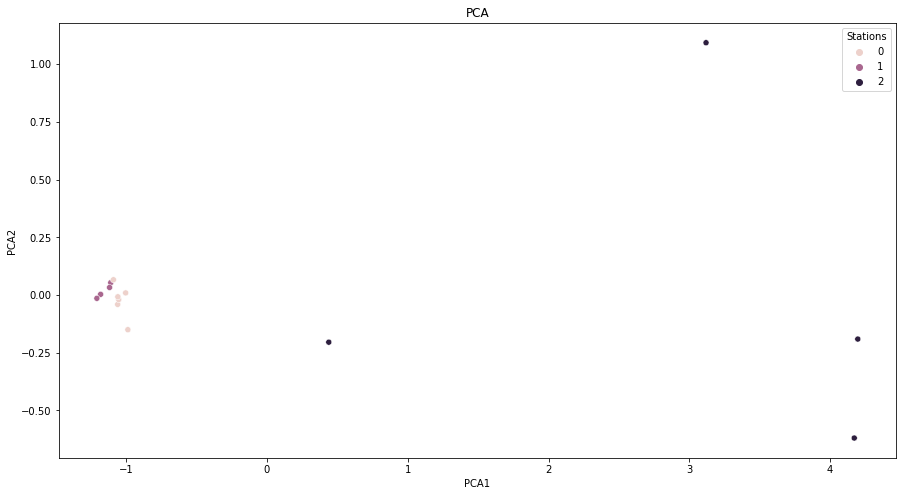

In [125]:
plt.figure(figsize=(15,8))
sns.scatterplot(pca_df[:,0], pca_df[:,1], hue=smaller_station_index)
plt.title('PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Stations')